<h2>Unit 7 Live Session </center> </h2>
<h4> W203 Instructional Team </h4>

<h4> Estimation </h4>
<center>![title](estimate.gif)</center>

#### Class Announcements
1. Announcement 1
2. Announcement 2
3. Announcement 3

#### 1.0 Introduction

We now have the tools to be able to take data (e.g. $\{X_i\}_{i=1}^n$)  and use it to infer information about the (joint) distribution of the underlying random variable ($X$). 

Generally this means that we will use the data to calculate point estimates for the parameters of the distribution of of the underlying random variable. In practice we are often most interested in $E(X)$ , $V(X)$ , or $Cov(X,Y)$ etc.

There are a number of techniques that you can use to develop a valid estimator for a parameter. These techniques vary in terms the principle used to arrive at the estimator and the strength of the assumptions needed to support it. 

All of these estimators are statistics meaning they are functions of the data $\{X_i\}_{i=1}^n$ 

Given the multiplicity of valid estimators for a parameter we need a frame work to evaluate them interms of its sampling distribution.

Suppose $\hat{\theta}_1$ and $\hat{\theta}_2$ are two valid estimators for a parameter $\theta$. We will compare these estimators in terms of two characteristics their sampling distributions.

* Bias: $E(\hat{\theta}_j - \theta)$

* Variance: $V(\hat{\theta}_j)$

Bias is the difference between the most likely value of the estimator $\hat{\theta}_j$ and $\theta$. Variance, as we already know, is how spread out the values of the estimator are around its most likely value.

As a general (meaning many exceptions exist) guideline

* If $E(\hat{\theta}_1 - \theta) = 0 $ and  $E(\hat{\theta}_2 - \theta) > 0 $ then the unbiased estimator $\theta_1$ is preferred to $\theta_2$ 

* If $E(\hat{\theta}_1 - \theta) = E(\hat{\theta}_2 - \theta) = 0 $ then the estimator with the smallest variance is preferred. 

#### 2.0 Discussion of Point Estimation, MOM, and The Method of ML

** 2.1 ** What is point estimation?

 >  Point estimation of a parameter $\theta$ is the value of a statistic which is regarded as, or has been shown to be, a sensible estimate for $\theta$. In other words we claim that our best estimate of $\theta$ with the available the data is $\hat{\theta}$.
 
 > This is often coupled with interval estimation which allows us to say something about the confidence we have in our point estimate.

** 2.2 ** In your own words, describe how the method of moments is used to estimate the unknown parameters?

  > In general, method of moments estimation is an estimation technique where one expresses the value of a parameter interms of a function of one or more theoretical moments (Expectations, Conditional Expectations, Covariances .... ) of a collection of random variables, then replaces these moments with suitable estimators with which one can caluculate a point estimate. For example
  $$ \hat{E}(X^k)= n^{-1}\sum_{i=1}^nX_i^k $$ 

  > or
  
$$ \begin{aligned}  \hat{\rho}(X,Y) &= \frac{n^{-1}\sum_{i=1}^n(X_i-\overline{X}_n)(Y_i - \overline{Y}_n)}{[(n-1)^{-1}\sum_{i=1}^n(X_i -\overline{X}_n)^2]^{1/2}[(n-1)^{-1}\sum_{i=1}^n(Y_i -\overline{Y}_n)^2]^{1/2}} \end{aligned} $$

** 2.3 ** In your own words, describe how the method of ML is used to estimate the unknown parameters?

  > The likelihood principle due to R.A. Fisher is to choose as an estimator of $\theta$ the value $\hat{\theta}$ the maximizes the likelihood (or probability) of observing a given sample. 
  
> In essence you will maximize the log of joint density of the sample by changing the values of it parameters.

  $$ \begin{aligned} \hat{\theta}_{MLE} &= \max_{\theta \in \Theta} \log\big[L(\{X_i\}_{i=1}^n;\theta)\big]  \\ &=\max_{\theta \in \Theta} \log \big[f(X_1,X_2,\ldots,X_n;\theta)\big] \\ &= \max_{\theta \in \Theta} \log \bigg[ \prod_{i=1}^n f(X_i;\theta) \bigg] \\ &= \max_{\theta \in \Theta} \sum_{i=1}^n \log\big[f(X_i;\theta)\big]  \end{aligned}$$ 
 
> Note: MLE estimation is makes much stronger assumptions in order to estimate $\theta$ the MOM because you have to "know" the distribution of $X_i$ up to the parameter $\theta$ in order to have a good estimate i.e. you have to know $f(\cdot | \theta)$ in order to maximize it.   

** 2.4 ** Why do data scientists need to understand likelihood?

> The principle of maximum likelihood is used everywhere in data science, in particular discrete choice model estimation is almost completely based on it. As a result they must know the assumptions and principle under which it is valid / invalid i.e. if $f(\cdot|\theta)$ is wrong everything else falls apart.

#### 3.0 Warm-up: Optimization in R

The method of maximum likelihood requires an optimization routine. For a few very simple probability models, a closed-form solution exists and the MLE can be derived by hand. In most cases, however, hand-derivation will be too tedious, if at all possible, and a numerical computation technique is needed.

Numerical computation techniques often require some sort of optimization. For our purpose in this live session, we will focus on the practice of maximizing likelihood functions using R.

There are many optimizers in R(), including optimize(), optim(), and optimx().  I will use optimize() which is very simple to use, but only works for one dimension.

As always, I encourage you to read the documentation of the functions you are using: [optim](http://stat.ethz.ch/R-manual/R-devel/library/stats/html/optim.html)

** 3.1 ** Optomization Example: 

Suppose that a firm's revenue $r$ from selling a product is related to price $p$ as follows:
$$ 
r = - p^2 + p + 2
$$

** 3.1.2 ** Explain how you would use calculus to find the maximizing price.

** 3.1.3 ** Solve this numerically in *R*, using the *optimize()* function.

In [15]:
f <- function(p) {
  -p^2 + p + 2
}
optimize(f, interval = c(0,100), maximum = TRUE)

$maximum
[1] 0.5

$objective
[1] 2.25

#### 4.0 Maximum Likelihood Estimation of Bernoulli Random Variables
Suppose that you’ve got a sequence of values $$ {1, 0, 0, 1, 0, 1, 1, 1, 1, 1} $$ which, say, indicates whether a printer jams each day, for the last 10 business days. Business Question: What is the probability ($p$) that the printer jams in any given day?

It resembles draws from a Bernoulli disribution. However, even if we want to model this as a Bernoulli distribution, we do not know what the value of the parameter, $p$, is.

It resembles draws from a Bernoulli disribution. However, even if we want to model this as a Bernoulli distribution, we do not know what the value of the parameter, $p$, is.

Let's review the steps to find the maximum likelihood estimate for $p$.

** 4.1 ** Define your random variables.

> Let $X_1, X_2, \dots , X_{10}$ be a sequence of $i.i.d.$ Bernoulli random variables with parameter $p$, where $X_i = 1$ if the printer was jammed on day $i$, and $X_i=0$ otherwise.

** 4.2 ** Write down the likelihood function.

> Remember that likelihood is just another way of looking at the probability function:

$$ \begin{aligned} L(p) &= P(\text{The data is } ( 1, 0, 0, 1, 0, 1, 1, 1, 1, 1) \text{ given p } ) \\ 
    &=P(X_1=1 \cap X_2=0 \cap ... \cap X_{10} = 1; p) \end{aligned} $$

 > **Question:** How can you simplify the last expression? What property do you use to do this?

> We can write down the likelihood for an individual day as follows:

$$P(X_i = x_i; p) = f(x_i;p) = p^{x_i}(1-p)^{1-x_i}$$
> Putting this together, our overall likelihood function is:

$$
\begin{aligned}
  L(p) &= f(x_1, \dots, x_{10}; p) \\
       &= \prod_{i=1}^{10} f({x_i;p}) \\
       &= \prod_{i=1}^{10} p^{x_i}(1-p)^{10-x_i} \\
       &= p^{\sum_{i=1}^{10} x_i} (1-p)^{10 - \sum_{i=1}^{10} x_i} \\
       &=p^7(1-p)^3
\end{aligned}
$$

** 4.3 ** (Optional) take the log of the likelihood function

$$
\begin{aligned}
  l(p)=ln(L(p)) &= ln[f(x_1, \dots, x_{10}; p)] \\
       &= \left( {\sum_{i=1}^{10} x_i} \right)ln(p) + \left({10 - \sum_{i=1}^{10} x_i} \right) ln(1-p)\\
       &=7ln(p) + 3ln(1-p)
\end{aligned}
$$

** 4.4 ** Maximize (the log of) likelihood using calculus

> Using the maximum likelihood approach, we want to select the parameter with the highest likelihood. For a Bernoulli variable we can search through the space of values for $p$ (i.e $[0, 1]$) that makes the data most probable to have been observed. In the async, Professor Laskowski demonstrated how to find the maximizing value of $p$ using calculus.

> Taking the first-order condition, we have

$$
\begin{aligned}
 \frac{d}{dp} l(p) &= \frac{d}{dp} \left( 7ln(p) + 3ln(1-p) \right) \\
 &= \frac{7}{p} - \frac{3}{1-p}
\end{aligned}
$$

> Set the slope equal to zero and solve. We obtain

$$
  \hat{p}_{MLE} = \frac{7}{10}
$$

** 4.5 ** Alternately, maximize the likelihood numerically

> Instead of using calculus, we will find this parameter numerically. We first need to define a function that specifies the probability of our data set. You may do this using code like the following.

> Let’s define the function:

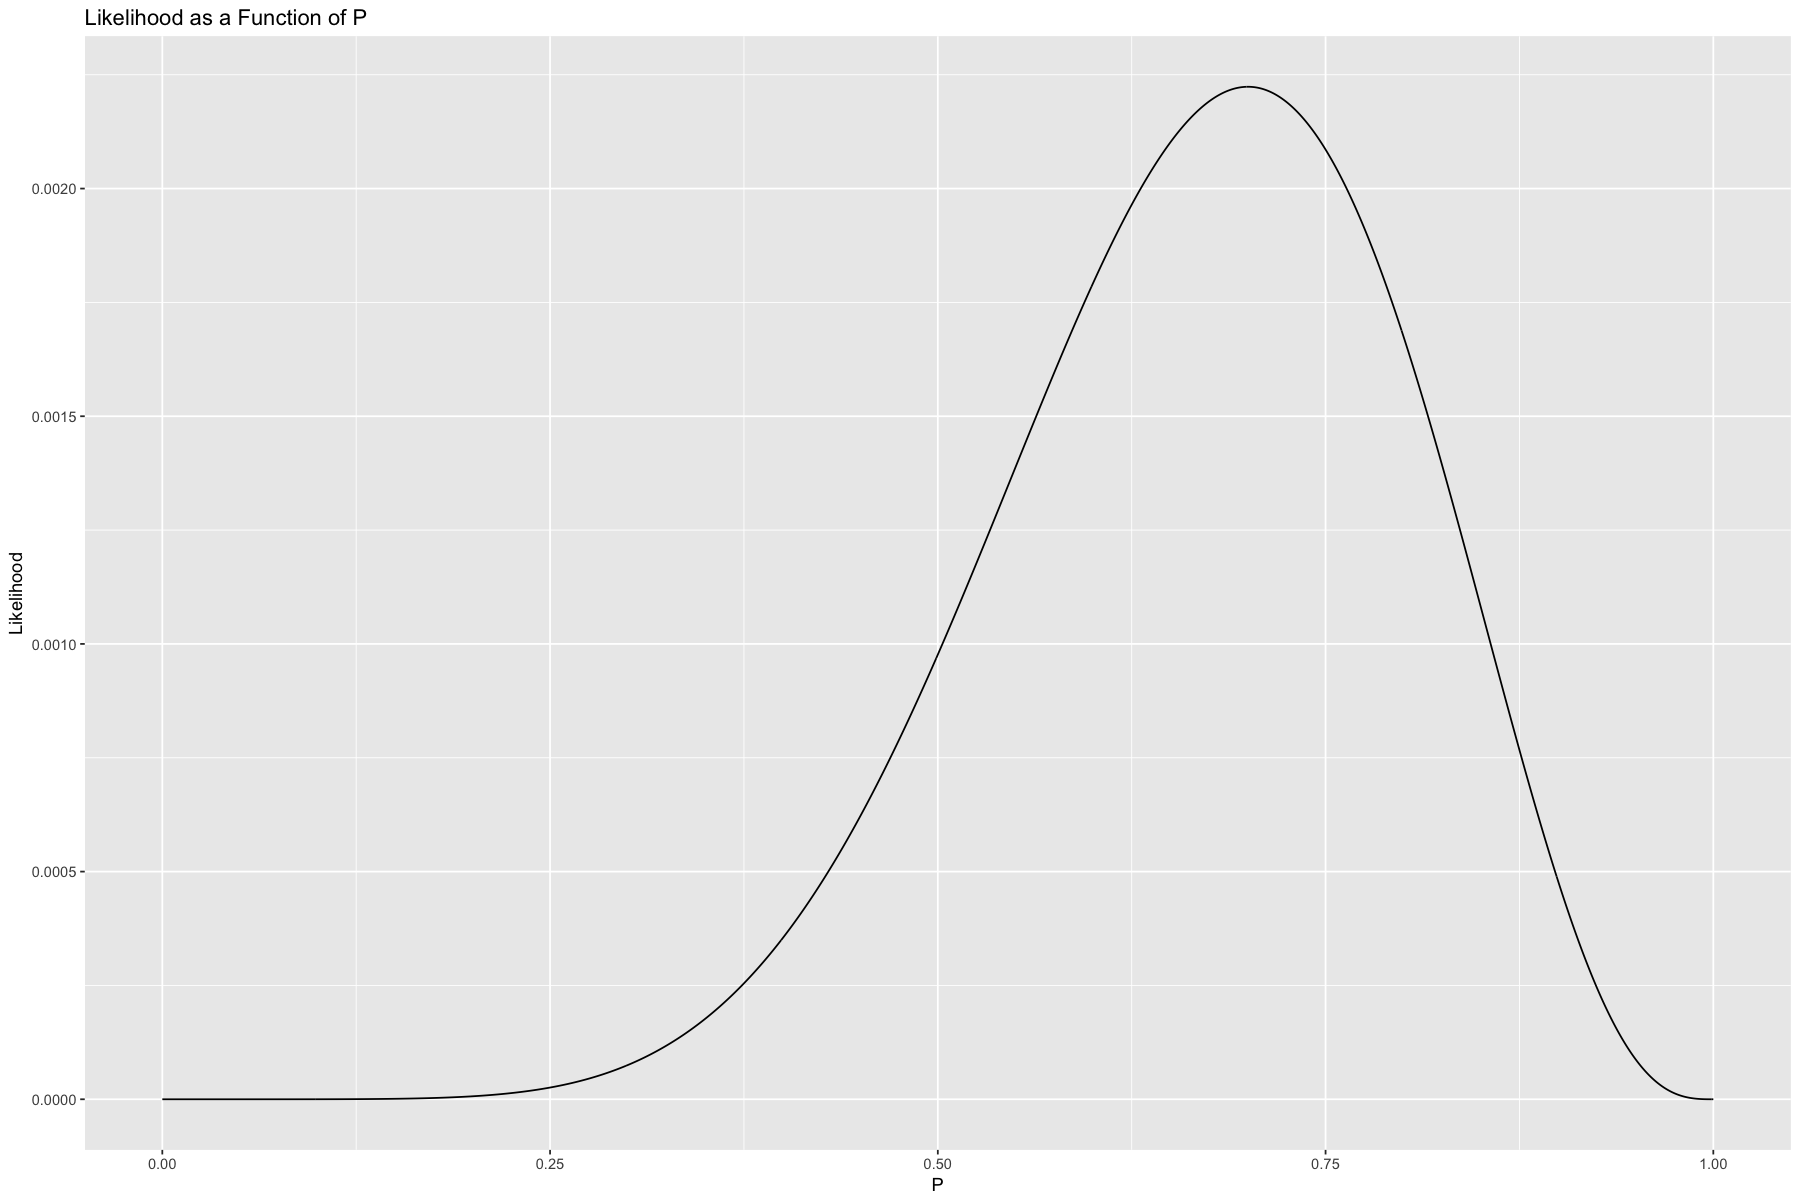

In [20]:
likelihood <- function(s, p)
{
  likelihood <- 1
  for (i in 1:length(s))
  {
    if (s[i] == 1)
    {
      likelihood <- likelihood * p
    }
    else
    {
      likelihood <- likelihood * (1 - p)
    }
  }
  return(likelihood)
}

# Let's graph the likelihood function first
library(ggplot2)
s <- c(1, 0, 0, 1, 0, 1, 1, 1, 1, 1)
p <- seq(0, 1, by = 0.001)
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 32)

qplot(p,
      sapply(p, function(p) {likelihood(s, p)}),
      geom = 'line',
      main = 'Likelihood as a Function of P',
      xlab = 'P',
      ylab = 'Likelihood')

> Use R’s optimization routine to find the maximum likelihood estimate of $p$. I use the general optimization routine *optim()* in this exericse.

In [17]:
n = 10
fn <- function(p) {likelihood(s, p)}
optimize(fn, interval = c(0,1), maximum = T)

$maximum
[1] 0.6999843

$objective
[1] 0.002223566

#### 5.0 MLE for Poisson Random Variables 

 A Poisson process is a simple model that statisticians use to describe how events occur over time.  Imagine that time stretches out on the x-axis, and each event is a single point on this axis.* 


<center> ![Poisson Time of Arrival.](Poisson_arrvls.png) </center>

The key feature of a Poisson process is that it is *memoryless*.  Loosely speaking, the probability that an event occurs in any (differentially small) instant of time is a constant.  It doesn't depend on how long ago the previous event was, nor does it depend on when future events occur.

Data scientists might use a Poisson process (or more complex variations) to represent:

  - The scoring of goals in a world cup match
  - The arrival of packets to an internet router
  - The arrival of customers to a website
  - The failure of servers in a cluster
  - The time between large meteors hitting the Earth

To understand a Poisson process, imagine an experiment in which you observe the arrival of cars at an intersection.  Assume that the probability density that a car arrives in a differentially small interval of time is just a constant.  The intersection is no more busy during the day than during the night.  

Moreover, the probability density that a car arrives at a particular instant does not depend on when the previous cars arrived, not when future cars are going to arrive.  Each moment of time is independent.  This is an example of what we call a memory-less process.

Next, suppose we use a camera to record the intersection for a particular length of time, and we write down the number of cars that arrive in that interval.  This is what we call a Poisson random variable.  It has a well-known probability mass function, given by,

$$
f(x|\lambda) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

Here, $\lambda$ is a parameter, which represents the mean number of cars in an interval.  (You may take the expectation to check this).  The following graph, "freely" borrowed from Wikipedia shows the probability mass function for different values of $\lambda$.

<center>![Poisson Distribution](Poisson_pmf.png) </center>

Suppose we take a random sample, and the data appears as below.

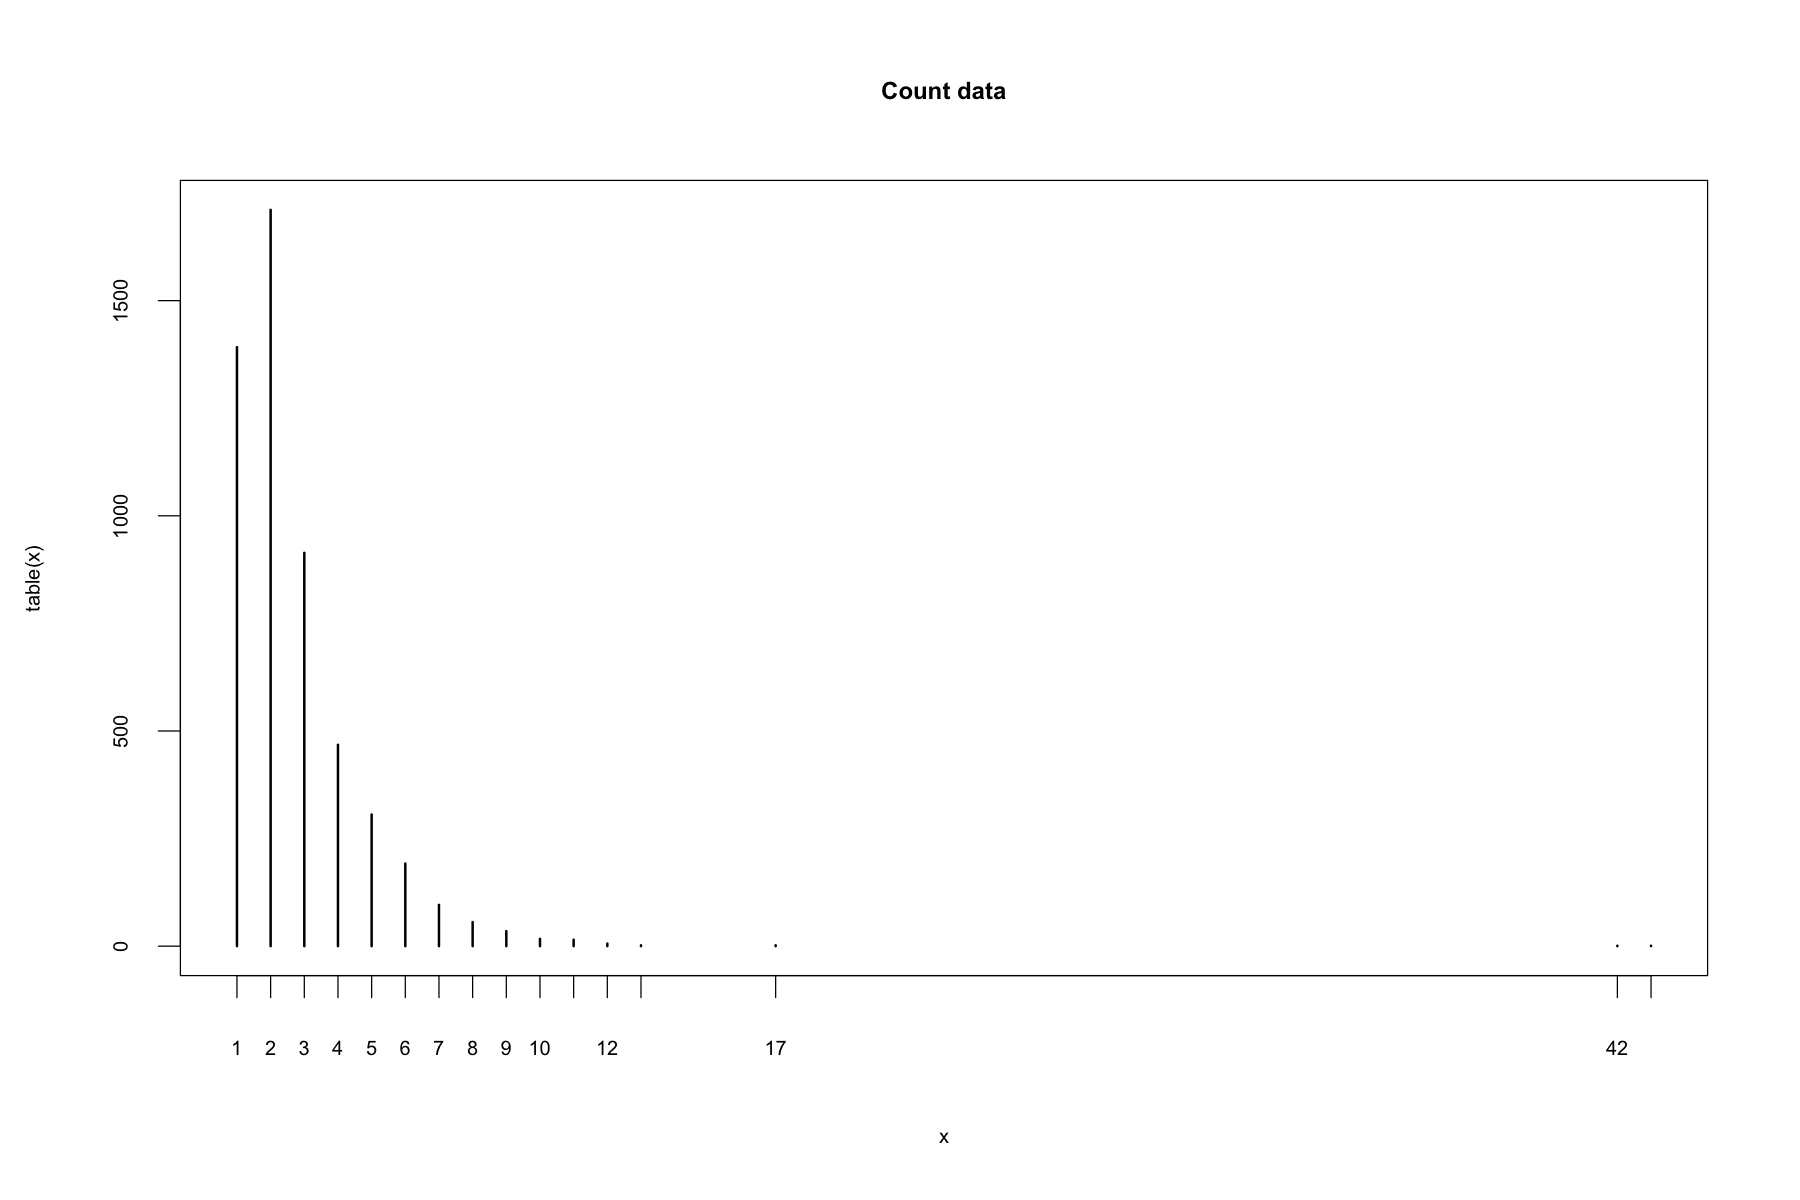

In [18]:
obs = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 42, 43)
freq = c(1392, 1711, 914, 468, 306, 192, 96, 56, 35, 17, 15, 6, 2, 2, 1, 1)

x <- rep(obs, freq)
plot(table(x), main="Count data")

** 5.1 ** Define your random variables.

>Let each $X_i$ for $i$ between $1$ and $n$ be an independent Poisson variable with rate parameter $\lambda$.

** 5.2 ** Write down the likelihood function.

> Since each $X_i$ is independent, 

$$L(\lambda) = P(X_1 = x_1 \cap X_2 = x_2 \cap ... \cap X_n = x_x |\lambda) = P(X_1 = x_1|\lambda) P(X_2 = x_2|\lambda) \cdot\cdot\cdot P(X_n = x_n|\lambda)$$

> Substituting in the equation for the Poisson probability mass function,

$$L(\lambda) = f(x_1,x_2,...,x_n|\lambda) = \prod_{i=1}^n \frac{\lambda^{x_i} e^{-\lambda}}{x_i!} $$

** 5.3 **  Take the log of the likelihood function

$$ \log(L(\lambda)) = \sum_{i=1}^n \left(x_i \log(\lambda)-\lambda - \log(x_i !)  \right) $$

** 5.4 ** Maximize (the log of) likelihood using calculus

> Take the 1st derivative with respect to $\lambda$ and set equal to zero

$$ \frac{1}{\lambda}\sum_{i=1}^n x_i - n = 0  $$
> Solve for $\lambda$

$$ \hat{\lambda}_{MLE} = \frac{\sum_{i=1}^n x_i}{n} $$

> It turns out the MLE estimate is just the average observed value.  This explains why $\lambda$ is called the rate parameter.


** 5.5 ** Maximize likelihood numerically

In [19]:
lik.poisson <- function(x, lambda) lambda^x/factorial(x) * exp(-lambda)

log.lklh.poisson <- function(x, lambda){ 
                     -sum(x * log(lambda) - log(factorial(x)) - lambda) 
}

#optim(par = 2, log.lklh.poisson, x = x)
optim(par = 2, log.lklh.poisson, x = x, method = "Brent", lower = 2, upper = 3)$par

[1] 2.703682